In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Q1

## Functions

In [2]:
def forward_euler(I, beta, gamma, dt):
    """
        Calculates a step in a function using the forward euler method.
        
        N: Population size
        I: Number of infected individuals
        beta: Transmission rate constant
        gamma: Per capita recovery rate
        t: Change in time
        
        Returns: New I values using forward euler
    """
    IDot = (I * (beta - gamma) * (1 - (I / (1 - gamma/beta))))

    INext = I + (IDot * dt)

    return INext

def analytical_solution(I0, beta, gamma, t):
    return (1 - (gamma / beta)) / (1 + ((1 - gamma/beta - I0)/(I0)) * np.exp(- (beta - gamma) * t))

def get_euler_and_analytical(I, beta, gamma, dt, t_vals):
    I0 = I
    IVals = [I]
    AVals = [I0]

    for i in range(len(t_vals)-1):
        I = forward_euler(I, beta, gamma, dt)
        IVals.append(I)
    
    for t in t_vals[:-1]:
        A = analytical_solution(I0, beta, gamma, t)
        AVals.append(A)

    return np.array(IVals), AVals

def get_max_abs_err(IVals, analytical):
    return np.max(np.abs(IVals - analytical))

def run_max_abs_error_sim(N, beta, gamma, total_time, dt_vals, I):
    max_abs_errs = []

    for dt in dt_vals:
        iterations = int(total_time / dt)
        t_vals = np.linspace(0, total_time, iterations)

        IVals, analytical = get_euler_and_analytical(I, beta, gamma, dt, t_vals)
        max_abs_err = get_max_abs_err(IVals, analytical)
        max_abs_errs.append(max_abs_err)
        
    return max_abs_errs

## 1a.

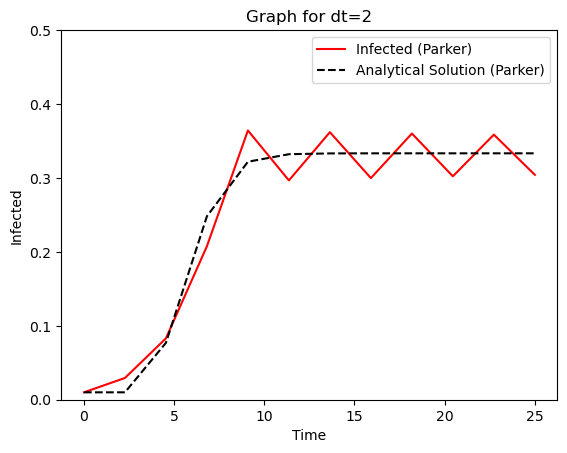

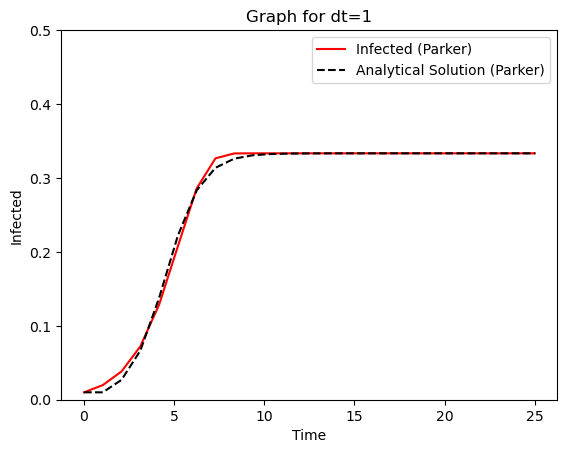

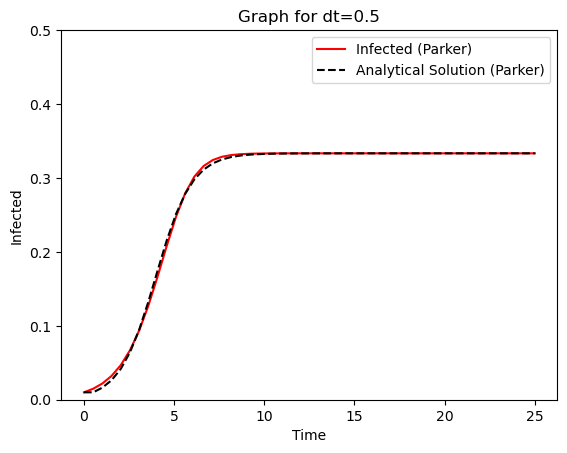

In [3]:
# Changing
dt_arr = [2, 1, 0.5]

# Constants
N = 1
beta = 3
gamma = 2
total_time = 25

for dt in dt_arr:
    I = 0.01
    iterations = int(total_time / dt)
    t_vals = np.linspace(0, total_time, iterations)

    IVals, analytical = get_euler_and_analytical(I, beta, gamma, dt, t_vals)

    # Create a new figure and axis for each set of beta and gamma values
    fig, ax = plt.subplots()

    # Plot Infected with a red solid line
    ax.plot(list(t_vals), IVals, label='Infected (Parker)', color='red', linestyle='-')

    # Plot Analytical with a black dashed line
    ax.plot(list(t_vals), analytical, label='Analytical Solution (Parker)', color='black', linestyle='--')

    # Add labels and legend for the current set of beta and gamma values
    ax.set_xlabel('Time')
    ax.set_ylabel('Infected')
    ax.set_ylim(0, 0.5)
    ax.legend()
    ax.set_title(f'Graph for dt={dt}')

    plt.show()


## 1c.

In [4]:
N = 1
beta = 3
gamma = 2
total_time = 25
dt_vals = [2.0, 1.0, 0.5]
I = 0.01

max_abs_errs = run_max_abs_error_sim(N, beta, gamma, total_time, dt_vals, I)

for i, max_abs_err in enumerate(max_abs_errs):
    print(f"Max absolute error for dt={dt_vals[i]}: {max_abs_err}")

Max absolute error for dt=2.0: 0.04231286961629033
Max absolute error for dt=1.0: 0.014466938301890248
Max absolute error for dt=0.5: 0.008086669180255274


## 1d.

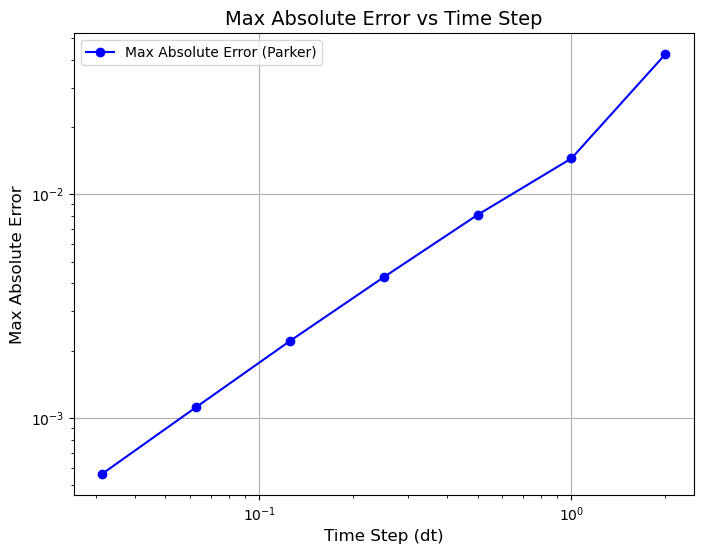

In [5]:
N = 1
beta = 3
gamma = 2
total_time = 25
I = 0.01
dt_vals = [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32]

max_abs_errs = run_max_abs_error_sim(N, beta, gamma, total_time, dt_vals, I)

plt.figure(figsize=(8, 6))
plt.loglog(dt_vals, max_abs_errs, marker='o', linestyle='-', color='b', label='Max Absolute Error (Parker)')

plt.xlabel('Time Step (dt)', fontsize=12)
plt.ylabel('Max Absolute Error', fontsize=12)
plt.title('Max Absolute Error vs Time Step', fontsize=14)
plt.legend()

plt.grid(True)
plt.show()

# Q2

## Functions

In [23]:
def forward_euler_ANM(S, I, V, beta, gamma, dt, t_vals, VE):
    V0 = (1 - VE) * V

    S = S/N
    I = I/N
    V0 = V0/N
    R = 0

    SVals = [S]
    IVals = [I]
    VVals = [V0]
    RVals = [R]

    for i in range(len(t_vals)-1):
        SDot = - beta * SVals[i-1] * IVals[i-1]
        SNext = SVals[i-1] + (SDot * dt)
        SVals.append(SNext)
        
        VDot = - beta * VVals[i-1] * IVals[i-1]
        VNext = VVals[i-1] + (VDot * dt)
        VVals.append(VNext)

        IDot = (beta * SVals[i-1] * IVals[i-1]) + (beta * VVals[i-1] * IVals[i-1]) - (gamma * IVals[i-1])
        INext = IVals[i-1] + (IDot * dt)
        IVals.append(INext)
        
        RDot = gamma * IVals[i-1]
        RNext = RVals[i-1] + (RDot * dt)
        RVals.append(RNext)
        
    SVals = np.array(SVals) * N
    VVals = np.array(VVals) * N
    IVals = np.array(IVals) * N
    RVals = np.array(RVals) * N

    return SVals, IVals, VVals, RVals

def forward_euler_leaky(S, I, V, beta, gamma, dt, t_vals, VE):
    S = S/N
    I = I/N
    V = V/N
    R = 0

    SVals = [S]
    IVals = [I]
    VVals = [V]
    RVals = [R]

    for i in range(len(t_vals)-1):
        SDot = - beta * SVals[i-1] * IVals[i-1]
        SNext = SVals[i-1] + (SDot * dt)
        SVals.append(SNext)
        
        VDot = - beta * VVals[i-1] * IVals[i-1] * (1-VE)
        VNext = VVals[i-1] + (VDot * dt)
        VVals.append(VNext)

        IDot = (beta * IVals[i-1] * (VVals[i-1] * (1-VE) + SVals[i-1])) - (gamma * IVals[i-1])
        INext = IVals[i-1] + (IDot * dt)
        IVals.append(INext)
        
        RDot = gamma * IVals[i-1]
        RNext = RVals[i-1] + (RDot * dt)
        RVals.append(RNext)
        
    SVals = np.array(SVals) * N
    VVals = np.array(VVals) * N
    IVals = np.array(IVals) * N
    RVals = np.array(RVals) * N

    return SVals, IVals, VVals, RVals

ANM Total Recovered: 169297.0
Leaky Total Recovered: 225886.0


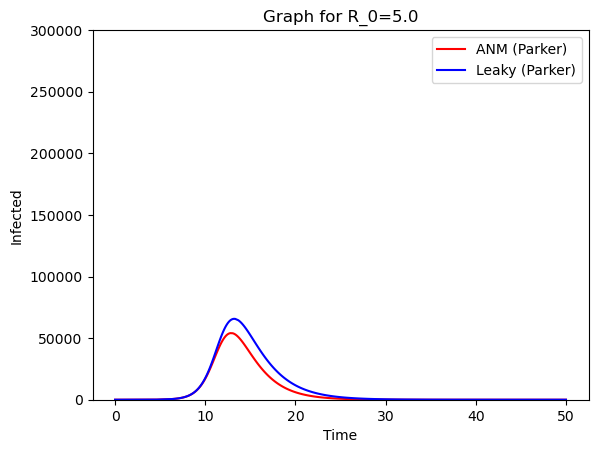

ANM Total Recovered: 158157.0
Leaky Total Recovered: 202516.0


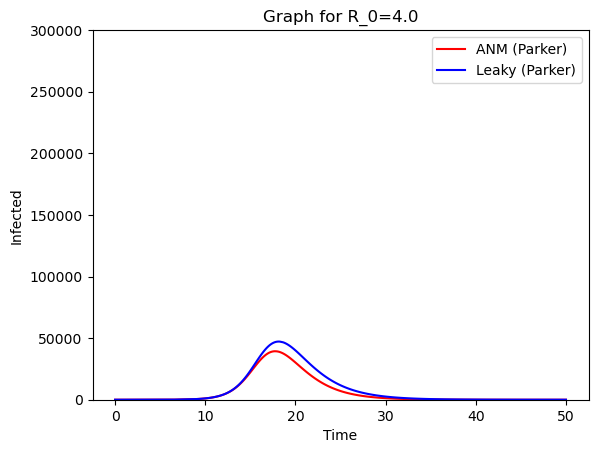

ANM Total Recovered: 131310.0
Leaky Total Recovered: 160601.0


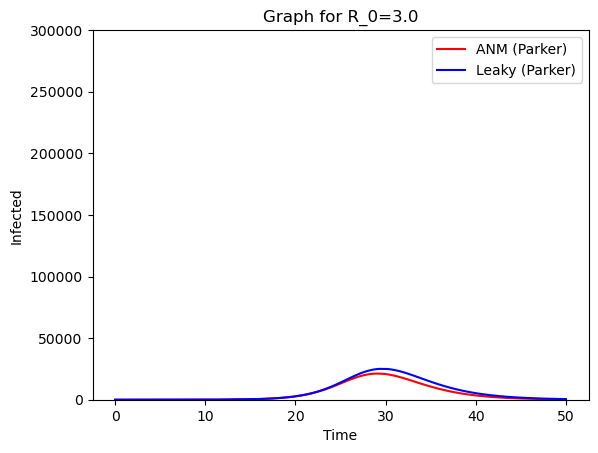

In [29]:
# Changing
beta_arr = [5, 4, 3]
gamma = 1

# Constants
total_time = 50
dt = 1/1000
iterations = int(total_time / dt)
t_vals = np.linspace(0, total_time, iterations)

VE = 0.8
VP = 0.5

N = 300000
V = N * VP
I = 1
S = N - V - I

for beta in beta_arr:
    ANMSVals, ANMIVals, ANMVVals, ANMRVals = forward_euler_ANM(S, I, V, beta, gamma, dt, t_vals, VE)
    
    LeakySVals, LeakyIVals, LeakyVVals, LeakyRVals = forward_euler_leaky(S, I, V, beta, gamma, dt, t_vals, VE)
    
    print(f'ANM Total Recovered: {round(ANMRVals[-1], 0)}')
    print(f'Leaky Total Recovered: {round(LeakyRVals[-1], 0)}')

    fig, ax = plt.subplots()

    ax.plot(list(t_vals), ANMIVals, label='ANM (Parker)', color='red', linestyle='-')
    ax.plot(list(t_vals), LeakyIVals, label='Leaky (Parker)', color='blue', linestyle='-')

    ax.set_xlabel('Time')
    ax.set_ylabel('Infected')
    plt.ylim(0, N)
    ax.legend()
    ax.set_title(f'Graph for R_0={beta/gamma}')

    plt.show()
